In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from information.revealer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
t = pd.Series(np.arange(10)[::-1], name='t', dtype=float)
#t /= t.max()
s = pd.Series([1, 0, 1, 0, 1, 0, 0, 0, 0, 0], name='s')
u = pd.Series([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], name='u')
v = pd.Series([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], name='v')
w = pd.Series([0, 0, 0, 0, 0, 4, 0, 2, 0, 0], name='w') / 9
x = pd.Series([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], name='x')
#y = pd.Series(np.random.normal(size=10), name='y')
#q = pd.Series(np.random.normal(size=10), name='q')
#r = pd.Series(np.random.normal(size=10), name='r')
#z = pd.Series([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], name='z') # identical to x
features = pd.concat([s, u, v, w, x], axis=1)

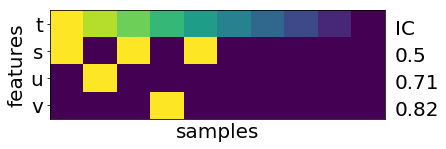

In [3]:
selected, ics = revealer(t, features, combine_first=True, combine='auto')
fig = plot_matches(t, features, selected, ics)

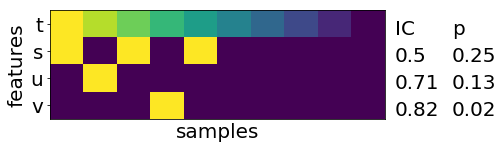

In [6]:
pvals = revealer_pvals(ics, t, features, selected, n_permutations=100)
fig = plot_matches(t, features, selected, ics, pvals)

### Combining before (IC) vs. after (CIC)

In [5]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)

In [8]:
ic_time = %timeit -o compute_ic(x, y)

10 loops, best of 3: 52 ms per loop


In [13]:
cic_time = %timeit -o compute_ic(x, y, z=z)

1 loop, best of 3: 1.57 s per loop


In [14]:
np.mean(cic_time.all_runs) / np.mean(ic_time.all_runs)

2.97761241436528

So CIC takes about 3x as long as IC here.

In [15]:
cfirst_time = %timeit -o selected, ics = revealer(t, features, combine_first=True, combine='auto')

1 loop, best of 3: 534 ms per loop


In [16]:
clast_time = %timeit -o selected, ics = revealer(t, features, combine_first=False, combine='auto')

1 loop, best of 3: 3.83 s per loop


In [17]:
np.mean(clast_time.all_runs) / np.mean(cfirst_time.all_runs)

6.8108331432719726

So combining before is ~7 times faster when applicable